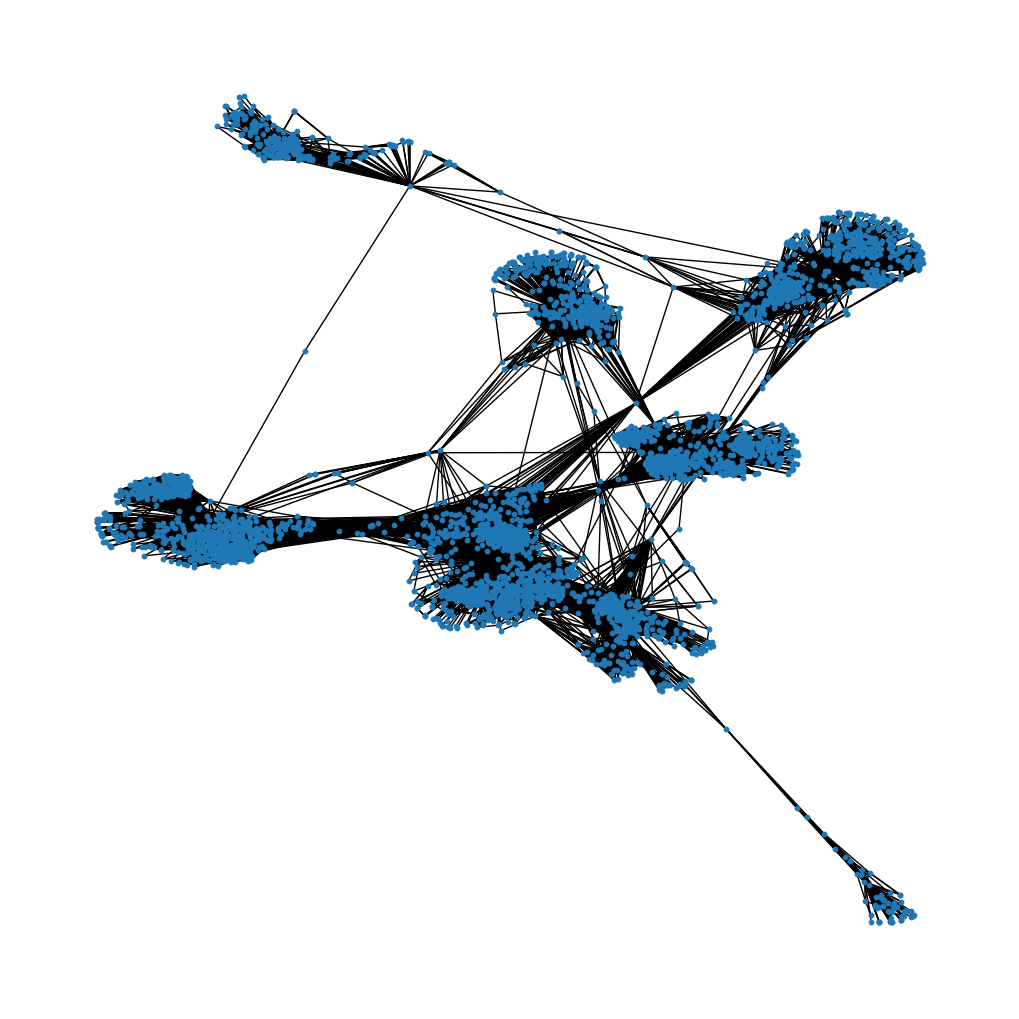

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

edges_file = 'facebook_combined.txt'  
G = nx.read_edgelist(edges_file)

plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10, with_labels=False)
plt.show()

In [20]:
from collections import Counter

def calculate_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    degree_count = Counter(degrees)
    num_nodes = float(nx.number_of_nodes(G))
    degree_distribution = {degree: count / num_nodes for degree, count in degree_count.items()}
    return degree_distribution

def calculate_clustering_distribution(G):
    clustering_coeffs = nx.clustering(G).values()
    
    rounded_coeffs = [round(c, 2) for c in clustering_coeffs]
    
    coeff_distribution = Counter(rounded_coeffs)
    
    total_nodes = sum(coeff_distribution.values())
    coeff_distribution = {k: v / total_nodes for k, v in coeff_distribution.items()}
    
    return coeff_distribution

def calculate_shortest_path_distribution(G):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    
    path_lengths = []
    for source, targets in shortest_paths.items():
        for target, length in targets.items():
            if source != target:  
                path_lengths.append(length)
    
    length_distribution = Counter(path_lengths)
    
    total_paths = sum(length_distribution.values())
    length_distribution = {k: v / total_paths for k, v in length_distribution.items()}
    
    return length_distribution

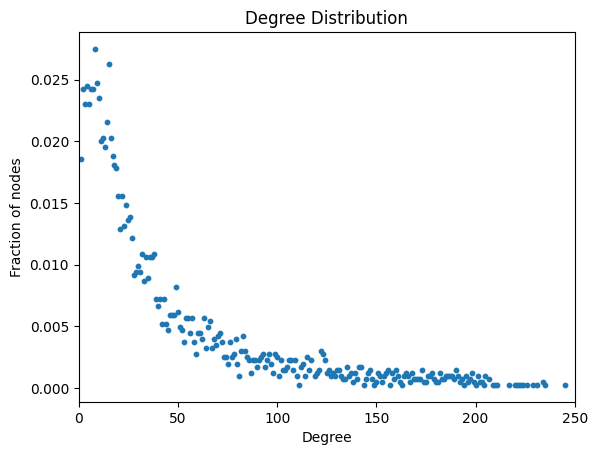

In [39]:
degree_distribution = calculate_degree_distribution(G)
degrees, fractions = zip(*sorted(degree_distribution.items()))
plt.figure()
plt.scatter(degrees, fractions, s=10)
plt.xlim(0, 250)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.title('Degree Distribution')
plt.show()

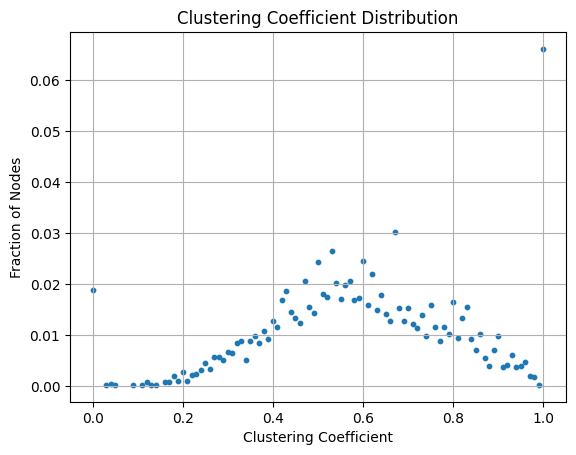

In [41]:
clustering_coefficients = calculate_clustering_distribution(G)

x, y = zip(*sorted(clustering_coefficients.items()))

plt.figure()
plt.scatter(x, y, s=10) 
plt.xlabel('Clustering Coefficient')
plt.ylabel('Fraction of Nodes')
plt.title('Clustering Coefficient Distribution')
plt.grid(True)
plt.show()

In [40]:
shortest_path_distribution = calculate_shortest_path_distribution(G)
plt.figure()
plt.bar(shortest_path_distribution.keys(), shortest_path_distribution.values())
plt.xlabel('Shortest Path Length')
plt.ylabel('Fraction of pairs of nodes')
plt.title('Shortest Path Length Distribution')
plt.show()

KeyboardInterrupt: 

In [5]:
import random

def erdos_renyi_gnl(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    possible_edges = [(i, j) for i in range(N) for j in range(i+1, N)]
    edges = random.sample(possible_edges, L)
    G.add_edges_from(edges)
    return G

def erdos_renyi_gnp(N, p):
    G = nx.erdos_renyi_graph(N, p)
    return G

def watts_strogatz(N, k, beta):
    G = nx.watts_strogatz_graph(N, k, beta)
    return G

In [42]:
def plot_degree_distribution(G, x_lim=None):
    degree_distribution = calculate_degree_distribution(G)
    degrees, fractions = zip(*sorted(degree_distribution.items()))
    plt.figure()
    plt.plot(degrees, fractions)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of nodes')
    plt.title('Degree Distribution')
    plt.show()
    
def plot_clustering_distribution(G):
    clustering_coefficients = calculate_clustering_distribution(G)
    
    x, y = zip(*sorted(clustering_coefficients.items()))
    
    plt.figure()
    plt.plot(x, y) 
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Fraction of Nodes')
    plt.title('Clustering Coefficient Distribution')
    plt.grid(True)
    plt.show()

def plot_shortest_path_distribution(G):
    shortest_path_distribution = calculate_shortest_path_distribution(G)
    plt.figure()
    plt.bar(shortest_path_distribution.keys(), shortest_path_distribution.values())
    plt.xlabel('Shortest Path Length')
    plt.ylabel('Fraction of pairs of nodes')
    plt.title('Shortest Path Length Distribution')
    plt.show()
    
def analyze_graph(G):
    plot_degree_distribution(G)
    avg_degree = sum(dict(G.degree()).values()) / float(G.number_of_nodes())
    print(f'Average Degree: {avg_degree}')

    plot_clustering_distribution(G)
    avg_clustering = nx.average_clustering(G)
    print(f'Average Clustering Coefficient: {avg_clustering}')

    plot_shortest_path_distribution(G)
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        avg_path_length = nx.average_shortest_path_length(G)
        print(f'Diameter: {diameter}')
        print(f'Average Path Length: {avg_path_length}')
    else:
        print('Graph is not connected, so diameter and average path length are not defined.')

Erdős-Rényi Model G(N, L)


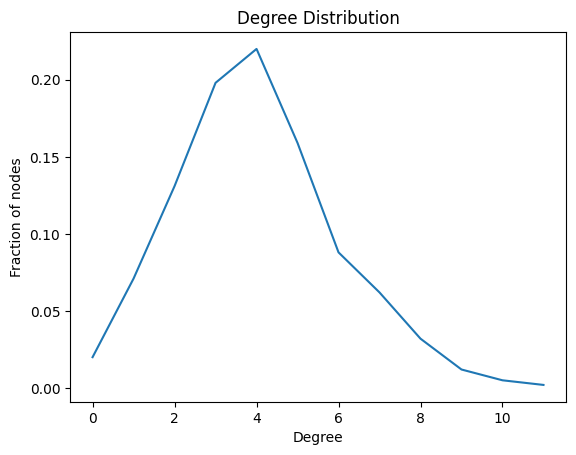

Average Degree: 4.0


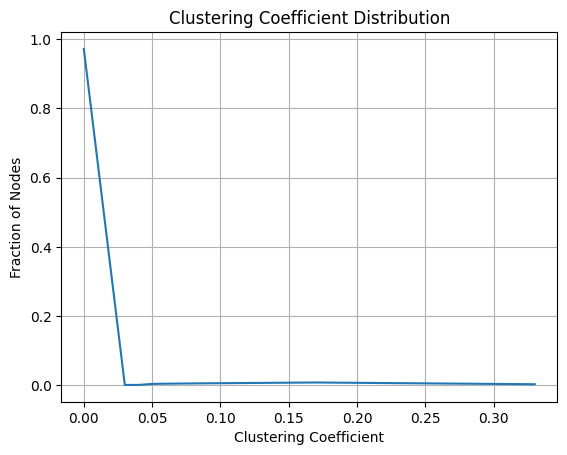

Average Clustering Coefficient: 0.0035158730158730152


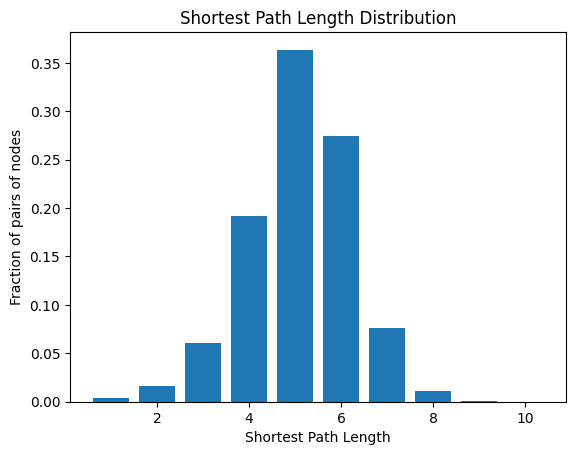

Graph is not connected, so diameter and average path length are not defined.
Erdős-Rényi-Gilbert Model G(N, p)


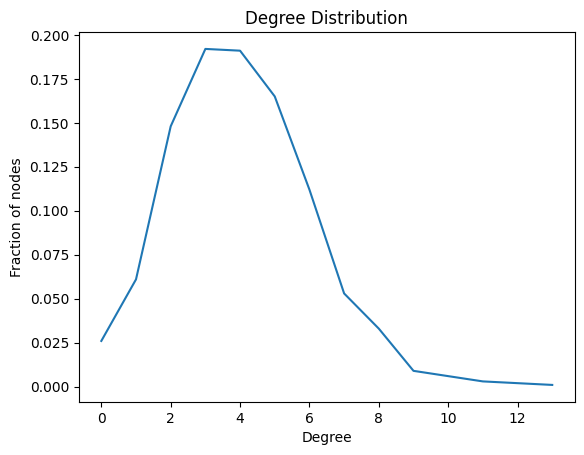

Average Degree: 4.016


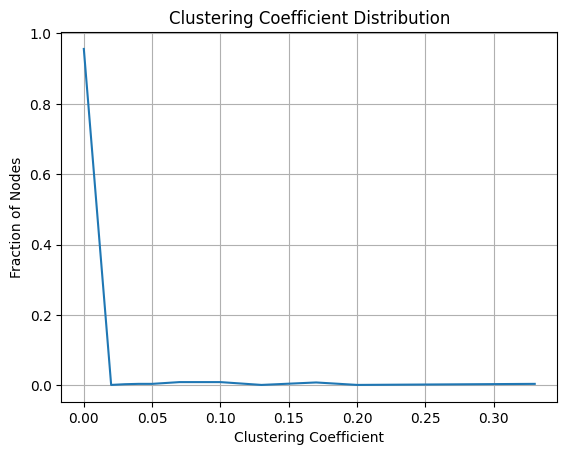

Average Clustering Coefficient: 0.004943006993006993


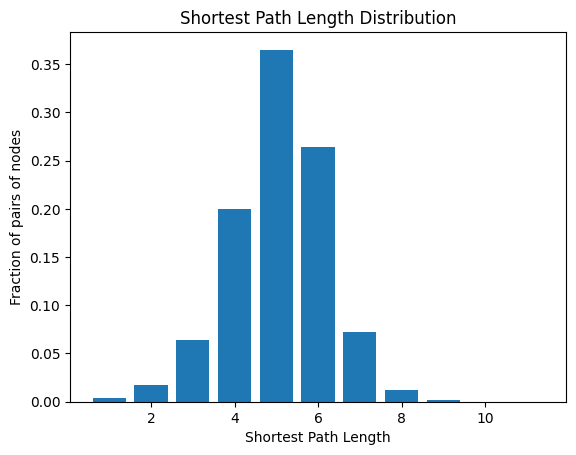

Graph is not connected, so diameter and average path length are not defined.
Watts-Strogatz Model WS(N, k, β)


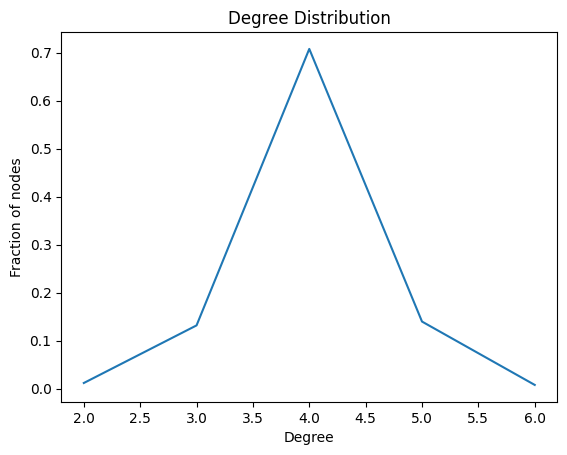

Average Degree: 4.0


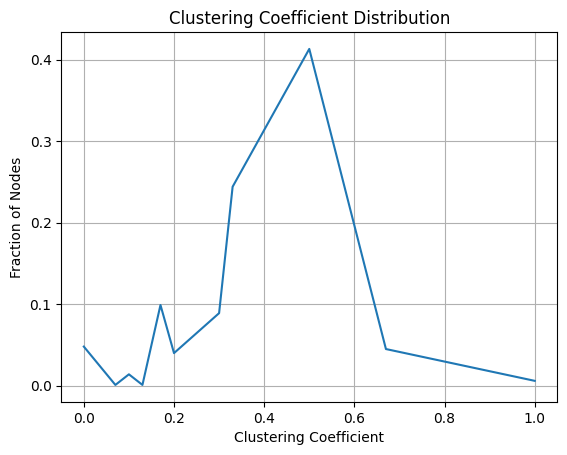

Average Clustering Coefficient: 0.37663333333333315


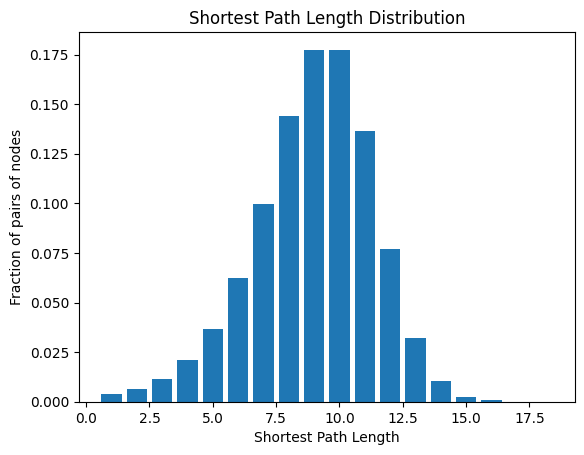

Diameter: 18
Average Path Length: 8.95412012012012


In [43]:
# Parameters
N = 1000
L = 2000
p = 0.004  
k = 4
beta = 0.1

G_gnl = erdos_renyi_gnl(N, L)
print("Erdős-Rényi Model G(N, L)")
analyze_graph(G_gnl)

G_gnp = erdos_renyi_gnp(N, p)
print("Erdős-Rényi-Gilbert Model G(N, p)")
analyze_graph(G_gnp)

G_ws = watts_strogatz(N, k, beta)
print("Watts-Strogatz Model WS(N, k, β)")
analyze_graph(G_ws)